# Classificação dos dados

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import plot_confusion_matrix
import matplotlib.pyplot as plt

In [2]:
df = pd.read_excel('tracks_features_plus_popularity_final.xlsx', usecols="C:AB")

/home/andrepalhares/.local/lib/python3.8/site-packages/pandas/io/excel/_base.py:1272: FutureWarning: Defining usecols with out of bounds indices is deprecated and will raise a ParserError in a future version.
  return self._reader.parse(


In [3]:
def obter_decada(linha):
    ano = str(linha['year'])
    return int(ano[:3] + "0")

df['decade'] = df.apply (lambda x: obter_decada(x), axis=1)

In [4]:
df = df[df['decade'] != "00"]
df.groupby('decade').size()

decade
1980     4379
1990    29907
2000    99990
2010    22524
dtype: int64

### UtilIzando o KNN para comparar com os resultados obtidos no trabalho anterior
##### Músicas entre 1980 e 2019

In [5]:
df_1980 = df[df['decade'] == 1980].sort_values(by=['popularity'], ascending=False)[:1500]
df_1990 = df[df['decade'] == 1990].sort_values(by=['popularity'], ascending=False)[:1500]
df_2000 = df[df['decade'] == 2000].sort_values(by=['popularity'], ascending=False)[:1500]
df_2010 = df[df['decade'] == 2010].sort_values(by=['popularity'], ascending=False)[:1500]

df_1980_a_2010 = pd.concat([df_1980, df_1990, df_2000, df_2010], ignore_index=True, sort=False)

df_1980_a_2010.groupby('decade').size()

decade
1980    1500
1990    1500
2000    1500
2010    1500
dtype: int64

In [6]:
X = df_1980_a_2010[['danceability', 'energy', 'key', 'loudness', 'mode', 
        'speechiness', 'acousticness', 'instrumentalness', 'liveness',
        'valence', 'tempo', 'duration_ms', 'time_signature']]
y = df_1980_a_2010['decade']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [7]:
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.fit_transform(X_test)

#### Gerando o melhor valor para n_neighbors

In [8]:
from sklearn.model_selection import GridSearchCV

knn = KNeighborsClassifier()
params = {'n_neighbors': np.arange(25, 1000, 15)}
knn_gscv = GridSearchCV(knn, params)
knn_gscv.fit(X, y)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 25,  40,  55,  70,  85, 100, 115, 130, 145, 160, 175, 190, 205,
       220, 235, 250, 265, 280, 295, 310, 325, 340, 355, 370, 385, 400,
       415, 430, 445, 460, 475, 490, 505, 520, 535, 550, 565, 580, 595,
       610, 625, 640, 655, 670, 685, 700, 715, 730, 745, 760, 775, 790,
       805, 820, 835, 850, 865, 880, 895, 910, 925, 940, 955, 970, 985])})

In [9]:
best_k = knn_gscv.best_params_['n_neighbors']
print('Melhor resultado: ', best_k)

Melhor resultado:  445


#### Classificação

In [10]:
classifier = KNeighborsClassifier(
    n_neighbors=best_k, 
    p=4, # quantidade de décadas a serem testadas
    metric='euclidean')

In [11]:
classifier.fit(X_train, y_train)

KNeighborsClassifier(metric='euclidean', n_neighbors=445, p=4)

In [12]:
y_pred = classifier.predict(X_test)

In [13]:
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[270 107  43  49]
 [115 158 103  67]
 [ 56 144 168  93]
 [ 70  91 107 159]]


In [14]:
# # https://scikit-learn.org/stable/modules/generated/sklearn.metrics.f1_score.html
print('f1_score: ', f1_score(y_test, y_pred, average='weighted'))

f1_score:  0.4184984710509631


In [15]:
print('accuracy_score:', accuracy_score(y_test, y_pred))

accuracy_score: 0.41944444444444445


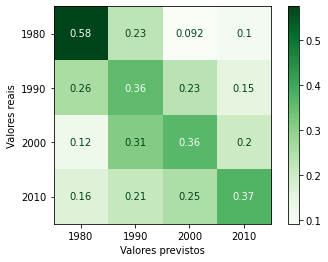

In [16]:
disp = plot_confusion_matrix(classifier, X_test, y_test,
                             display_labels=[1980, 1990, 2000, 2010],
                             cmap=plt.cm.Greens,
                             normalize='true')
plt.xlabel('Valores previstos')
plt.ylabel('Valores reais')
plt.show()